In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Desktop\Temperature.csv")

In [4]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


EDA

In [5]:
df.shape

(7752, 25)

our data set has 7752 rows and 25 columns including our target variables

In [6]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

Our target varaibles are numerical so it is a regression problem

Checking null values

In [7]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Our data set has missing values which we need to treat

In [8]:
df=df.dropna(how='any',axis=0)

From the above we have removed null values

In [10]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

After removing the null values this is how our data looks

In [11]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


So we do not have any null values so let us proceed further

df.head()

The date column in our data set does not provide a information so dropping them

In [19]:
df=df.drop(['Date'],axis=1)

now let us plot the correlation using heatmap

<AxesSubplot:>

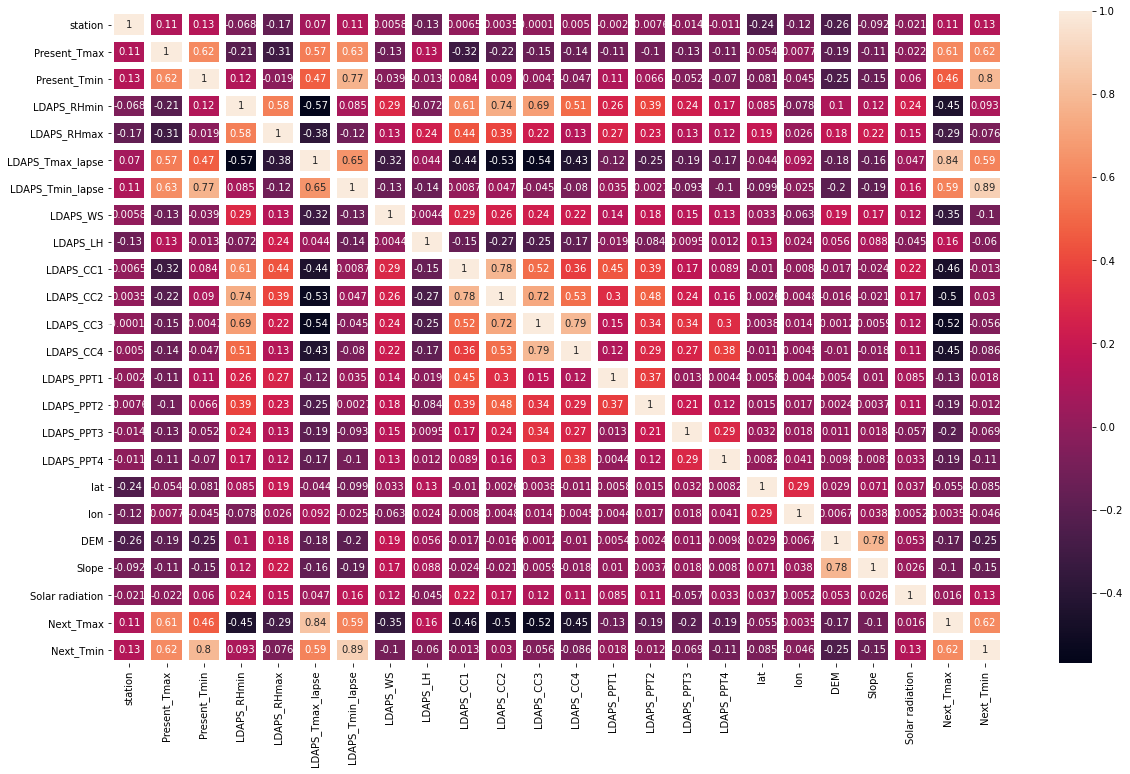

In [21]:
cor=df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(cor,annot=True,linewidths=6)

The above heat map  gives correlation between different features

Let us remove the Next_Tmax,Next_Tmin columns and save them in separate data set

In [22]:
df_new=df.drop(['Next_Tmax','Next_Tmin'],axis=1)
labels_max=df['Next_Tmax']
labels_min=df['Next_Tmin']

let us check the shape of the split we did

In [24]:
df_new.shape

(7588, 22)

In [25]:
labels_max.shape

(7588,)

In [26]:
labels_min.shape

(7588,)

In [35]:
df_new.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246


Model prediction

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [46]:
accuracy_scores_max={}
Rmse_min={}
accuracy_scores_min={}
Rmse_max={}

In [64]:
regression=LinearRegression()
regression.fit(df_new,labels_max)

LinearRegression()

In [65]:
regression.score(df_new,labels_max)

0.7815910478561496

So for maximum tempearture linear regression gives 78.5% accuarcy

In [66]:
regression=LinearRegression()
regression.fit(df_new,labels_min)

LinearRegression()

In [67]:
regression.score(df_new,labels_min)

0.8359284428563195

So for minimum tempearture gives 83.5% accuracy

Using ridgeCv

In [68]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
lasscv=LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(df_new,labels_max)

LassoCV(normalize=True)

In [69]:
alpha=lasscv.alpha_
alpha

0.0003680399483970547

In [70]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(df_new,labels_max)

Lasso(alpha=0.0003680399483970547)

In [71]:
lasso_reg.score(df_new,labels_max)

0.7815829654641382

Lasso gives 78.15% for max temperature

In [72]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(df_new,labels_min)

Lasso(alpha=0.0003680399483970547)

In [73]:
lasso_reg.score(df_new,labels_min)

0.8359071695766702

Lasso gives 83.5% for max temperature

Using RidgeCV

In [74]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(df_new,labels_max)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [75]:
ridgecv.alpha_

0.001

In [77]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(df_new,labels_max)

Ridge(alpha=0.001)

In [78]:
ridge_model.score(df_new,labels_max)

0.7815910478548203

Ridge cv gives 78.15 for max tempearture

In [79]:
ridgecv.fit(df_new,labels_min)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [80]:
ridgecv.alpha_

0.001

In [81]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(df_new,labels_min)

Ridge(alpha=0.001)

In [82]:
ridge_model.score(df_new,labels_min)

0.8359284428555359

Ridge gives 83.5% for min tempearture

##### Applying ensemble Techniques

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(df_new,labels_max)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
rf=RandomForestRegressor(criterion="mae",max_features="auto")
rf.fit(df_new,labels_max)
rf.score(df_new,labels_max)
pred_decision=rf.predict(df_new)
rfs=r2_score(df_new,pred_decision)
print('R2 SCORE:',rfs*100)
rfscore=cross_val_score(rf,df_new,labels_max,cv=5)
rfc=rfscore.mean()
print("Cross val score:",rfc*100)

ValueError: y_true and y_pred have different number of output (22!=1)